In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [17]:
names = ['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','target']
data_train = pd.read_csv('avila/avila-tr.txt', header = None, names = names)
data_test = pd.read_csv('avila/avila-ts.txt', header = None, names = names)

In [37]:
data_train.target = data_train.target.astype('category').cat.codes
data_test.target = data_test.target.astype('category').cat.codes

In [38]:
data_train.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,target
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,0
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,0
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,0
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,0
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,5


In [39]:
data_test.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,target
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144,9
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758,0
2,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952,8
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999,4
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681,0


In [40]:
data_train.isnull().sum()

f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
f8        0
f9        0
f10       0
target    0
dtype: int64

In [41]:
data_test.isnull().sum()

f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
f8        0
f9        0
f10       0
target    0
dtype: int64

In [42]:
data_train.shape,data_test.shape

((10430, 11), (10437, 11))

In [59]:
x = data_train.drop('target',axis=1)
y = data_train['target']

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 42)

In [96]:
x_train = data_train.drop('target',axis=1)
y_train = data_train['target']
x_test = data_test.drop('target', axis = 1)
y_test = data_test['target']
x_train.shape,y_train.shape,x_test.shape,y_test.shape


((10430, 10), (10430,), (10437, 10), (10437,))

In [97]:
model = tf.keras.models.Sequential()

In [98]:
model.add(tf.keras.layers.Dense(16,input_dim = 10, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(16, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(16,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(12, activation = tf.nn.softmax))

In [99]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [100]:
from keras.callbacks import ModelCheckpoint
ckpt_model = 'avila.best.hdf5'
checkpoint = ModelCheckpoint(ckpt_model, 
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=True,
                            mode='max')
callbacks_list = [checkpoint]

In [101]:
history = model.fit(x_train,
                    y_train,
                    validation_data=(x_test, y_test),
                    epochs=100,
                    batch_size=10,
                    callbacks=callbacks_list,
                    verbose=0)


Epoch 00001: val_acc improved from -inf to 0.53138, saving model to avila.best.hdf5

Epoch 00002: val_acc improved from 0.53138 to 0.59749, saving model to avila.best.hdf5

Epoch 00003: val_acc improved from 0.59749 to 0.63486, saving model to avila.best.hdf5

Epoch 00004: val_acc improved from 0.63486 to 0.65229, saving model to avila.best.hdf5

Epoch 00005: val_acc improved from 0.65229 to 0.66619, saving model to avila.best.hdf5

Epoch 00006: val_acc improved from 0.66619 to 0.67567, saving model to avila.best.hdf5

Epoch 00007: val_acc did not improve from 0.67567

Epoch 00008: val_acc improved from 0.67567 to 0.68420, saving model to avila.best.hdf5

Epoch 00009: val_acc improved from 0.68420 to 0.68870, saving model to avila.best.hdf5

Epoch 00010: val_acc improved from 0.68870 to 0.69752, saving model to avila.best.hdf5

Epoch 00011: val_acc improved from 0.69752 to 0.70873, saving model to avila.best.hdf5

Epoch 00012: val_acc improved from 0.70873 to 0.71103, saving model to 

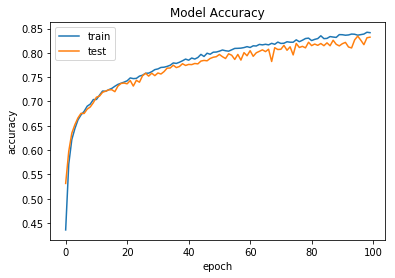

In [102]:
# Model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

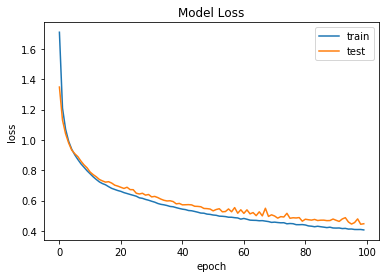

In [103]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
# print final accuracy
scores = model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))